Classe predita para o cliente novo: Média
Distancias dos vizinhos mais próximos: [1.90714286 2.33571429 2.41428571]
IDs dos vizinhos mais próximos: [1 2 3]
Classes dos vizinhos mais próximos: ['Média' 'Baixa' 'Média']


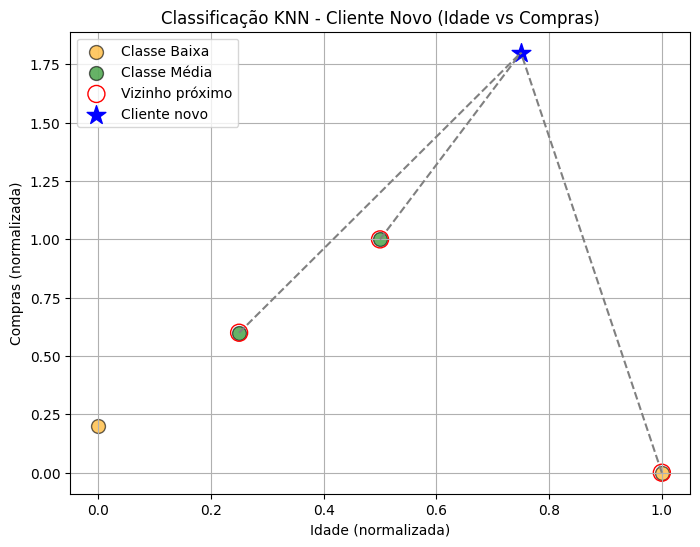

In [65]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dados dos clientes
clientes = pd.DataFrame({
    'ID': ['A', 'B', 'C', 'D'],
    'Idade': [25, 35, 45, 30],
    'Renda': [50, 65, 85, 70],
    'Compras': [20, 40, 15, 30],
    'Classe': ['Baixa', 'Média', 'Baixa', 'Média']
}) 

# Cliente novo
cliente_novo = pd.DataFrame({
    'ID': ['E'],
    'Idade': [40],
    'Renda': [95],
    'Compras': [60],
    'Classe': ['Alta']
})

# Normalização dos dados
scaler = MinMaxScaler()
clientes[['Idade', 'Renda', 'Compras']] = scaler.fit_transform(clientes[['Idade', 'Renda', 'Compras']])
cliente_novo[['Idade', 'Renda', 'Compras']] = scaler.transform(cliente_novo[['Idade', 'Renda', 'Compras']])


# Codificação da classe
le = LabelEncoder()
clientes['Classe'] = le.fit_transform(clientes['Classe'])

# Calculo da distancia de Manhattan

distan_man = np.abs(clientes[['Idade', 'Renda', 'Compras']].values - cliente_novo[['Idade', 'Renda', 'Compras']].values).sum(axis=1)
id_vizinhos = np.argsort(distan_man)[:3]
vizinhos = clientes.iloc [id_vizinhos]["Classe"].values
distancias_vizinhos = distan_man[id_vizinhos]

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(clientes[['Idade', 'Renda', 'Compras']], clientes['Classe'])
predicao = knn.predict(cliente_novo[['Idade', 'Renda', 'Compras']])
classe_predita = le.inverse_transform(predicao)[0]

# Resultados
print(f"Classe predita para o cliente novo: {classe_predita}")
print(F"Distancias dos vizinhos mais próximos: {distancias_vizinhos}")
print(f"IDs dos vizinhos mais próximos: {id_vizinhos}")
print(f"Classes dos vizinhos mais próximos: {le.inverse_transform(vizinhos)}")

# Visualização dos dados

colors = {"Baixa": "orange", "Média": "green", "Alta": "pink"}


# Decodificar as classes para visualização
clientes['ClasseNome'] = le.inverse_transform(clientes['Classe'])

# Gráfico
plt.figure(figsize=(8, 6))

# Plotar os clientes existentes
for classe in clientes['ClasseNome'].unique():
    subset = clientes[clientes['ClasseNome'] == classe]
    plt.scatter(subset['Idade'], subset['Compras'], 
                label=f"Classe {classe}", 
                color=colors[classe], 
                s=100, alpha=0.6, edgecolor='k')

# Plotar os vizinhos mais próximos
vizinhos_ids = clientes.iloc[id_vizinhos]['ID']
first_label = True
for idx in id_vizinhos:
    vizinho = clientes.iloc[idx]
    if first_label:
        plt.scatter(vizinho['Idade'], vizinho['Compras'], 
                    edgecolor='red', facecolor='none', s=150, marker='o', label='Vizinho próximo')
        first_label = False
    else:
        plt.scatter(vizinho['Idade'], vizinho['Compras'], 
                    edgecolor='red', facecolor='none', s=150, marker='o')


# Plotar o cliente novo
plt.scatter(cliente_novo['Idade'], cliente_novo['Compras'], 
            color='blue', s=200, marker='*', label='Cliente novo')

for idx in id_vizinhos:
    viz = clientes.iloc[idx]
    plt.plot([viz["Idade"], cliente_novo.iloc[0]["Idade"]],
            [viz["Compras"], cliente_novo.iloc[0]["Compras"]],
            linestyle='dashed', color='gray')

# Ajustes finais do gráfico
plt.xlabel('Idade (normalizada)')
plt.ylabel('Compras (normalizada)')
plt.title('Classificação KNN - Cliente Novo (Idade vs Compras)')
plt.legend(loc='best')
plt.grid(True)
plt.show()



